In [1]:
#Arkaprava roy
#20.01.2026

In [ ]:
import pandas as pd
import numpy as np

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
df = pd.read_csv('/content/hate_speech.csv')

In [5]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
df = df[['tweet', 'class']]
df.rename(columns={'tweet': 'text', 'class': 'label'}, inplace=True)
df.head()

,text,label
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1


In [7]:
df.isnull().sum()

,0
text,0
label,0


In [8]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'rt[\s]+', '', text)          # remove RT
    text = re.sub(r'@\w+', '', text)             # remove mentions
    text = re.sub(r'http\S+|www\S+', '', text)   # remove URLs
    text = re.sub(r'&amp;', 'and', text)         # fix HTML
    text = re.sub(r'&#\d+;', '', text)           # remove emojis
    text = re.sub(r'\d+', '', text)              # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()

    words = text.split()
    words = [stemmer.stem(w) for w in words if w not in stop_words]

    return " ".join(words)

In [10]:
df['clean_text'] = df['text'].apply(clean_text)
df[['text', 'clean_text']].head()

,text,clean_text
0,!!! RT @mayasolovely: As a woman you shouldn't...,woman shouldnt complain clean hous man alway t...
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat coldtyga dwn bad cuffin dat hoe st place
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg ever fuck bitch stato cri confus shit
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranni
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya


In [11]:
df['label'].value_counts()

,count
label,
1,19190
2,4163
0,1430


In [12]:
from sklearn.model_selection import train_test_split

X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.8971151906394997

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.17      0.26       286
           1       0.91      0.97      0.94      3838
           2       0.86      0.82      0.84       833

    accuracy                           0.90      4957
   macro avg       0.80      0.65      0.68      4957
weighted avg       0.88      0.90      0.88      4957



In [16]:
confusion_matrix(y_test, y_pred)

array([[  48,  218,   20],
       [  27, 3716,   95],
       [   2,  148,  683]])

In [17]:
def predict_text(text):
    text = clean_text(text)
    vector = vectorizer.transform([text])
    prediction = model.predict(vector)[0]

    if prediction == 0:
        return "Hate Speech"
    elif prediction == 1:
        return "Offensive Language"
    else:
        return "Neither / Normal"

In [18]:
predict_text("Fuck off")

'Offensive Language'

In [19]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [20]:
svm_pred = svm_model.predict(X_test_tfidf)

print("SVM Accuracy:", accuracy_score(y_test, svm_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, svm_pred))

SVM Accuracy: 0.8930804922332055

Classification Report:

              precision    recall  f1-score   support

           0       0.52      0.23      0.32       286
           1       0.92      0.96      0.94      3838
           2       0.84      0.83      0.83       833

    accuracy                           0.89      4957
   macro avg       0.76      0.67      0.70      4957
weighted avg       0.88      0.89      0.88      4957



In [21]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

nb_pred = nb_model.predict(X_test_tfidf)

print("NB Accuracy:", accuracy_score(y_test, nb_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, nb_pred))

NB Accuracy: 0.8478918700827113

Classification Report:

              precision    recall  f1-score   support

           0       0.60      0.01      0.02       286
           1       0.84      0.99      0.91      3838
           2       0.89      0.48      0.62       833

    accuracy                           0.85      4957
   macro avg       0.78      0.49      0.52      4957
weighted avg       0.84      0.85      0.81      4957



In [22]:
from tensorflow.keras.utils import to_categorical

y_dl = to_categorical(df['label'], num_classes=3)

In [23]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_WORDS = 10000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])

sequences = tokenizer.texts_to_sequences(df['clean_text'])
padded_sequences = pad_sequences(sequences, maxlen=MAX_LEN, padding='post')

In [24]:
X_train_dl, X_test_dl, y_train_dl, y_test_dl = train_test_split(
    padded_sequences, y_dl,
    test_size=0.2,
    random_state=42,
    stratify=df['label']
)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

model_dl = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    LSTM(128, return_sequences=False),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model_dl.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model_dl.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
history = model_dl.fit(
    X_train_dl,
    y_train_dl,
    epochs=5,
    batch_size=64,
    validation_split=0.1
)

Epoch 1/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.7632 - loss: 0.7056 - val_accuracy: 0.7736 - val_loss: 0.6660
Epoch 2/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7761 - loss: 0.6662 - val_accuracy: 0.7736 - val_loss: 0.6679
Epoch 3/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7747 - loss: 0.6647 - val_accuracy: 0.7736 - val_loss: 0.6664
Epoch 4/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7720 - loss: 0.6702 - val_accuracy: 0.7736 - val_loss: 0.6674
Epoch 5/5
279/279 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7746 - loss: 0.6665 - val_accuracy: 0.7736 - val_loss: 0.6673


In [27]:
loss, accuracy = model_dl.evaluate(X_test_dl, y_test_dl)
print("LSTM Accuracy:", accuracy)

155/155 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7710 - loss: 0.6663
LSTM Accuracy: 0.7742586135864258


In [28]:
import numpy as np

def predict_text_dl(text):
    text = clean_text(text)
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=MAX_LEN, padding='post')
    pred = model_dl.predict(pad)

    label = np.argmax(pred)

    if label == 0:
        return "Hate Speech"
    elif label == 1:
        return "Offensive Language"
    else:
        return "Neither / Normal"

In [ ]:
!pip install transformers torch scikit-learn

In [30]:
import tensorflow as tf
print(tf.keras.__version__)

3.10.0


In [31]:
import torch
import numpy as np
import pandas as pd

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [32]:
X = df['text'].astype(str)
y = df['label']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [34]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [35]:
def tokenize_data(texts, labels):
    return tokenizer(
        list(texts),
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors="pt"
    ), torch.tensor(labels.values)

In [36]:
train_encodings, train_labels = tokenize_data(X_train, y_train)
test_encodings, test_labels = tokenize_data(X_test, y_test)

In [37]:
class HateDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)

In [38]:
train_dataset = HateDataset(train_encodings, train_labels)
test_dataset = HateDataset(test_encodings, test_labels)

In [39]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=3
)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",  # Changed from evaluation_strategy to eval_strategy
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    report_to="none"
)

In [41]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    return {
        "accuracy": accuracy_score(labels, preds)
    }

In [42]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.295600,0.260842,0.916683
2,0.221400,0.273596,0.918903


TrainOutput(global_step=4958, training_loss=0.27471981687188, metrics={'train_runtime': 1058.8578, 'train_samples_per_second': 37.448, 'train_steps_per_second': 4.682, 'total_flos': 2608243309937664.0, 'train_loss': 0.27471981687188, 'epoch': 2.0})

In [43]:
preds = trainer.predict(test_dataset)
y_pred = np.argmax(preds.predictions, axis=1)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.44      0.47       286
           1       0.95      0.95      0.95      3838
           2       0.90      0.90      0.90       833

    accuracy                           0.92      4957
   macro avg       0.78      0.77      0.77      4957
weighted avg       0.91      0.92      0.92      4957



In [44]:
def predict_text_bert(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=128
    )

    with torch.no_grad():
        outputs = model(**inputs)

    label = torch.argmax(outputs.logits).item()

    if label == 0:
        return "Hate Speech"
    elif label == 1:
        return "Offensive Language"
    else:
        return "Neither / Normal"

In [47]:
def predict_text_bert(text):
    inputs = tokenizer(
        text,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=128
    )

    # Move inputs to the same device as the model
    inputs = {key: val.to(model.device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)

    label = torch.argmax(outputs.logits).item()

    if label == 0:
        return "Hate Speech"
    elif label == 1:
        return "Offensive Language"
    else:
        return "Neither / Normal"

predict_text_bert("I will kill you")

'Offensive Language'

In [48]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Loss
    plt.figure()
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training vs Validation Loss')
    plt.legend()
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(history.history['accuracy'], label='train_accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training vs Validation Accuracy')
    plt.legend()
    plt.show()

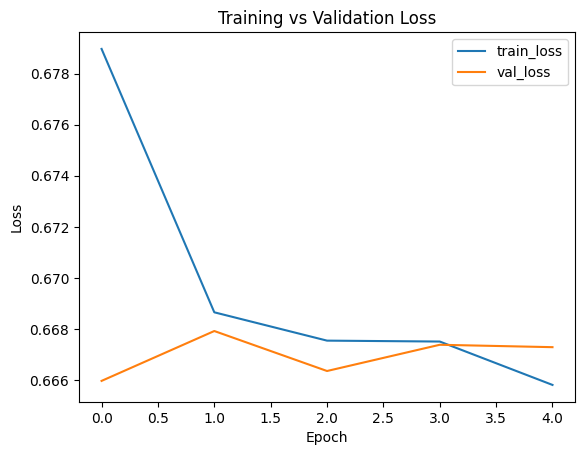

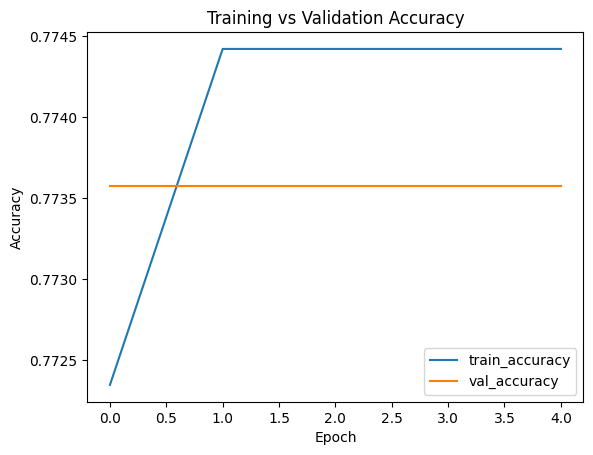

In [49]:
plot_training_history(history)

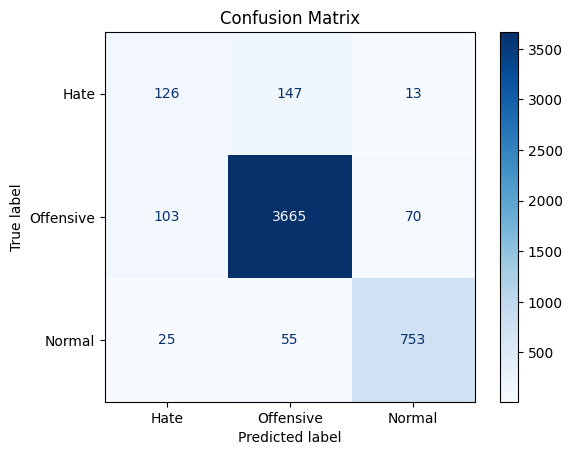

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# y_pred was already calculated from the trainer in cell dRxN_Zf81Qh6
# y_pred = trainer.predict(test_dataset)
# y_pred = np.argmax(preds.predictions, axis=1) # This y_pred is available

# Use the already existing y_pred and y_test for the confusion matrix
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=['Hate', 'Offensive', 'Normal']
)

disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [53]:
from sklearn.metrics import classification_report

print(classification_report(
    y_test,
    y_pred,
    target_names=['Hate', 'Offensive', 'Normal']
))

              precision    recall  f1-score   support

        Hate       0.50      0.44      0.47       286
   Offensive       0.95      0.95      0.95      3838
      Normal       0.90      0.90      0.90       833

    accuracy                           0.92      4957
   macro avg       0.78      0.77      0.77      4957
weighted avg       0.91      0.92      0.92      4957



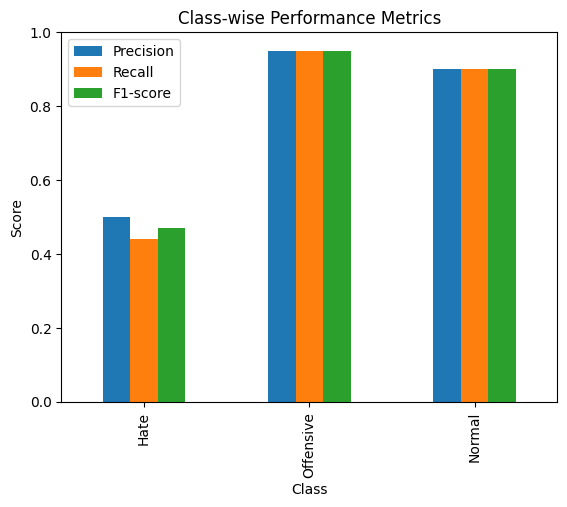

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

report = {
    "Class": ["Hate", "Offensive", "Normal"],
    "Precision": [0.50, 0.95, 0.90],
    "Recall": [0.44, 0.95, 0.90],
    "F1-score": [0.47, 0.95, 0.90]
}

df_report = pd.DataFrame(report).set_index("Class")
df_report.plot(kind="bar")
plt.title("Class-wise Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.show()

In [57]:
import pandas as pd

# Create a DataFrame containing the test set with original indices
df_test_subset = df.loc[y_test.index].copy()

# Add the predicted labels from the BERT model to this subset
df_test_subset['predicted_label'] = y_pred

# Identify the errors where the actual label does not match the predicted label
errors = df_test_subset[df_test_subset['label'] != df_test_subset['predicted_label']].copy()

# Focus on hate misclassifications (where the true label was 0)
hate_errors = errors[errors['label'] == 0]

hate_errors.head(10)

,text,label,clean_text,predicted_label
19777,RT @obeyyreggie: stfu hoe RT &#8220;@tedddydga...,0,stfu hoe im proud african american proud afric...,1
19527,RT @lildurk_: I don't fuck with bitch niggas I...,0,dont fuck bitch nigga fuck nigga bitch,1
21210,Stupid teabagger restaurant making customers p...,0,stupid teabagg restaur make custom pay minimum...,2
12496,Lmao let these hoes be hoes ain't no Savin nem,0,lmao let hoe hoe aint savin nem,1
19245,RT @imDOPE_GetHigh: @Whackko man some lame nig...,0,man lame niggah find im unfollow tf ass,1
23897,harm this pussy instead RT @ABC7: missing 26-y...,0,harm pussi instead miss yrold usc medic studen...,1
13979,"RT ""@_ThatGAPeach: &amp; alla my niggas hot bo...",0,alla nigga hot boy dont bring ice bitch,1
7172,@thewagnerer fags***,0,fag,1
24265,niggas ain't playin a gram of defense man Geor...,0,nigga aint playin gram defens man georg need t...,1
15372,RT @GottaLuvLexci_: &#128557;&#128557;&#128557...,0,tight pant loud color look like fag,1


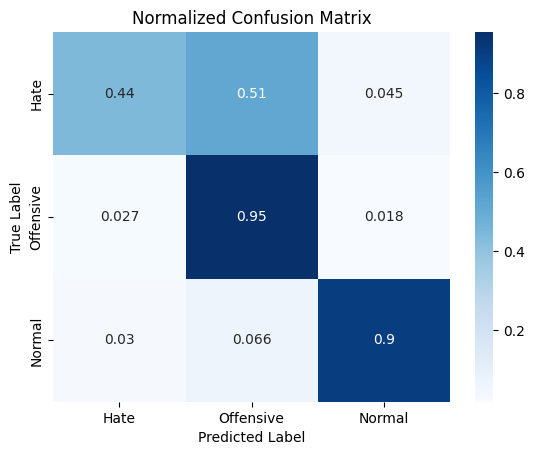

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cm = confusion_matrix(y_test, y_pred)
cm_norm = cm / cm.sum(axis=1, keepdims=True)

sns.heatmap(cm_norm, annot=True, cmap="Blues",
            xticklabels=["Hate", "Offensive", "Normal"],
            yticklabels=["Hate", "Offensive", "Normal"])

plt.title("Normalized Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

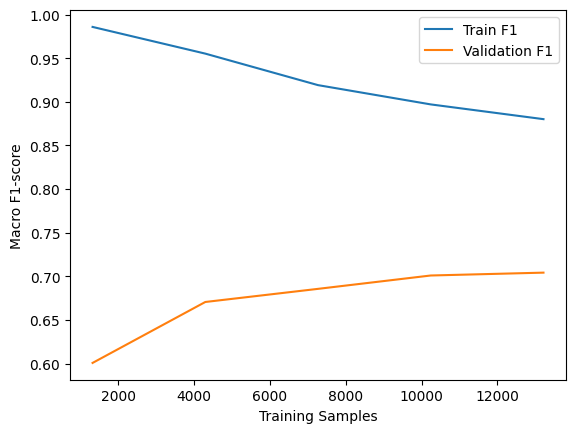

In [60]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, val_scores = learning_curve(
    svm_model,
    X_train_tfidf,
    y_train,
    cv=3,
    scoring="f1_macro",
    train_sizes=np.linspace(0.1, 1.0, 5)
)

plt.plot(train_sizes, train_scores.mean(axis=1), label="Train F1")
plt.plot(train_sizes, val_scores.mean(axis=1), label="Validation F1")
plt.xlabel("Training Samples")
plt.ylabel("Macro F1-score")
plt.legend()
plt.show()